# Load packages and data

In [1]:
# Loading the required packages to run this notebook
import src.utils.utils as utils
from src.visualisation.VisualiseTrajectories import VisualiseTrajectories
from src.data.Datasets import AISDiscreteRepresentation
from pathlib import Path

# Define the region to look into
region = "Bornholm"
zoom = 8
continuous_representation=False

In [2]:
# Use the VisualiseTrajectories class
fig_size = (10, 10)
visualise_trajectories = VisualiseTrajectories(region, save_figures=True, plot_figures=True, fig_size=fig_size, zoom=zoom,
                                               continuous_representation=continuous_representation)
processed_data_dir =  visualise_trajectories.processed_data_dir

# Load the static Google Map image for the RIO
img = visualise_trajectories.read_static_map()

# Visualise multiple trajectories geographically - Comparison

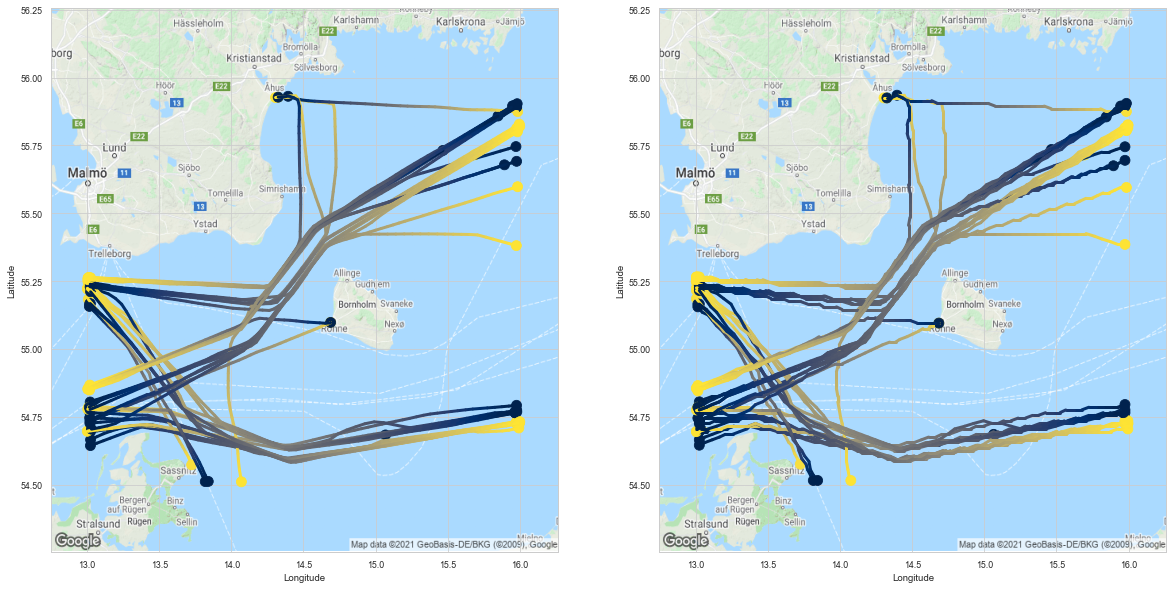

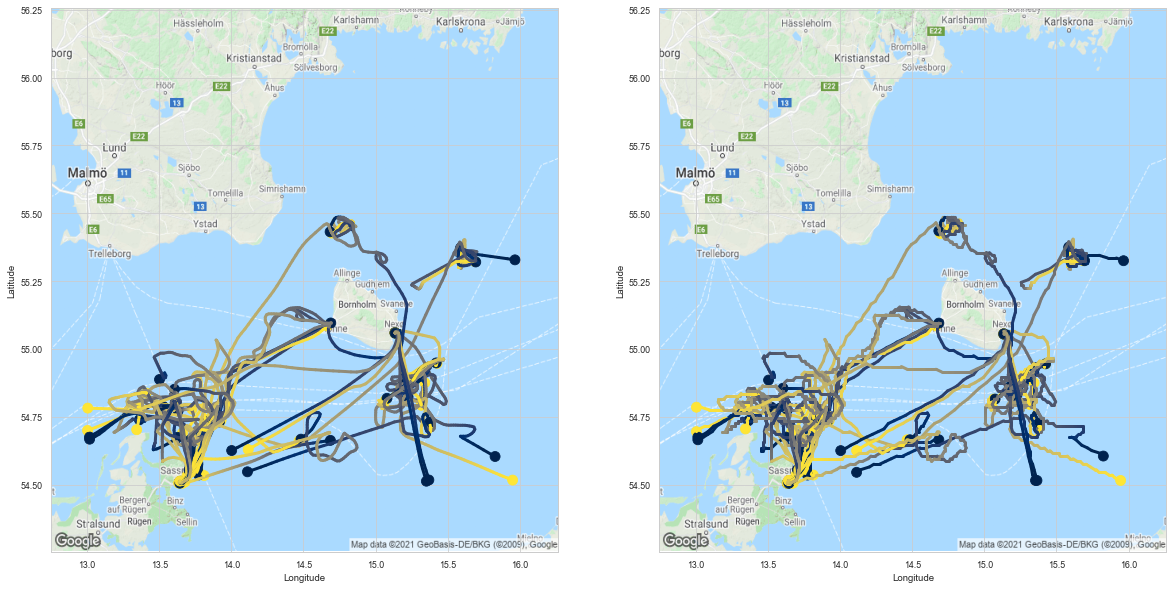

In [3]:
# Plot Cargo and tankers on one side and fishing vessel trajectory examples on the other
visualise_trajectories.fig_size = (20,10)
fig, ax = visualise_trajectories.visualise_static_map(img, subplots=[1, 2])
fig2, ax2 = visualise_trajectories.visualise_static_map(img, subplots=[1, 2])

# Plot some cargo and tanker vessel trajectory examples
file_name = "RegionBornholm_01062019_30092019_CargTank_14400_86400_600"
data_file = processed_data_dir / ("data_" + file_name + ".pkl")
data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")
data_info_carg_tank = utils.read_data_info_file(data_info_file) # Read the info file to know how to read the data file
tracks_carg_tank = visualise_trajectories.plot_multiple_tracks(ax[0], indicies=data_info_carg_tank["indicies"][:50],
                                                               data_path=data_file, use_cmap=True)
data_set = AISDiscreteRepresentation(file_name, data_info=data_info_carg_tank, indicies=data_info_carg_tank["indicies"][:50])
df = utils.get_tracks_from_dataset(data_set, continuous_representation=continuous_representation)
tracks = visualise_trajectories.plot_multiple_tracks(ax[1], df=df, data_path=data_file, use_cmap=True)

file_name = "RegionBornholm_01062019_30092019_Fish_14400_86400_600"
data_file = processed_data_dir / ("data_" + file_name + ".pkl")
data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")
data_info_fish = utils.read_data_info_file(data_info_file) # Read the info file to know how to read the data file
tracks_fish = visualise_trajectories.plot_multiple_tracks(ax2[0], indicies=data_info_fish["indicies"][:50],
                                                          data_path=data_file, use_cmap=True)
data_set = AISDiscreteRepresentation(file_name, data_info=data_info_fish, indicies=data_info_fish["indicies"][:50])
df = utils.get_tracks_from_dataset(data_set, continuous_representation=continuous_representation)
tracks = visualise_trajectories.plot_multiple_tracks(ax2[1], df=df, data_path=data_file, use_cmap=True)